# Demo-Colab

The free version of Colab provides access to Nvidia T4 GPUs. Free users can switch to T4 GPU for GPU acceleration by clicking `Runtime` > `Change runtime type` > selecting `T4 GPU`.

### **Download the Deep-scSTAR from Github**

In [ ]:
!git clone https://github.com/Hao-Zou-lab/Deep-scSTAR.git

Cloning into 'Deep-scSTAR'...
remote: Enumerating objects: 193, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 193 (delta 42), reused 59 (delta 14), pack-reused 88 (from 1)
Receiving objects: 100% (193/193), 9.44 MiB | 18.96 MiB/s, done.
Resolving deltas: 100% (83/83), done.


### **Install packages**

In [ ]:
!pip install umap-learn
!pip install scanpy
!pip install bbknn
!pip install palettable

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 9.0 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=ef36c10bda04861631402e0a5f4d77681b6aeda2d0e7e70b8727e26e5e8582e2
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [ ]:
import warnings
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import palettable
from sklearn import datasets
#import anndata as ad
import scanpy as sc
from anndata import AnnData
import anndata as ad
import pandas as pd
from scipy.sparse import issparse
import numpy as np
import pooch
from openai import OpenAI
from matplotlib.pyplot import rc_context
import os

In [ ]:
sc.settings.set_figure_params(dpi=100, facecolor="white", color_map="viridis")
sc.settings.verbosity = 0
sc.logging.print_header()

scanpy==1.10.3 anndata==0.10.9 umap==0.5.7 numpy==1.26.4 scipy==1.13.1 pandas==2.2.2 scikit-learn==1.5.2 statsmodels==0.14.4 pynndescent==0.5.13


### **Set Working Directory**

In [ ]:
import os
os.chdir('/content/Deep-scSTAR/')

### **Download Demo Data**

In [ ]:
!gdown https://drive.google.com/uc?id=1LZI80qfz2eLKzEL2zjegk9Po7F1LIwps -O /content/Processed_GSE179994_CD8.h5ad

Downloading...
From (original): https://drive.google.com/uc?id=1LZI80qfz2eLKzEL2zjegk9Po7F1LIwps
From (redirected): https://drive.google.com/uc?id=1LZI80qfz2eLKzEL2zjegk9Po7F1LIwps&confirm=t&uuid=f54126df-424b-4354-8e26-4a6fe3b022f7
To: /content/GSE179994_CD8.h5ad
100% 580M/580M [00:12<00:00, 45.1MB/s]


### **Reading**

In [ ]:
adata=sc.read_h5ad('/content/Processed_GSE179994_CD8.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 32474 × 15330
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cellid', 'patient', 'sample', 'celltype', 'cluster', 'response', 'response2', 'biosite', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'HSP_CLASS', 'leiden_res_ori_0.02', 'leiden_res_ori_0.50', 'leiden_res_ori_1.20', 'Raw', 'cell_type_gpt_ori', 'Dsc_cluster', 'Dsc'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Dsc_cluster_colors', 'Dsc_colors',

In [ ]:
unique_responses = adata.obs['response'].unique()
print("Unique categories in 'response':", unique_responses)
print("Number of unique categories in 'response':", len(unique_responses))

Unique categories in 'response': ['R', 'NR']
Categories (2, object): ['NR', 'R']
Number of unique categories in 'response': 2


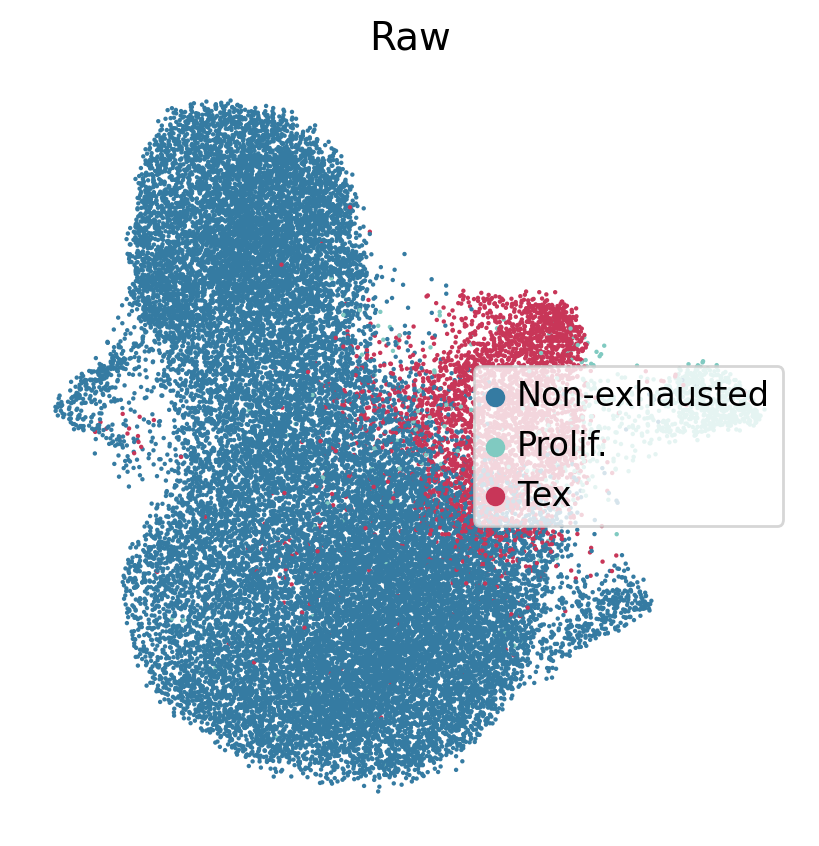

In [ ]:
#Fig3a
adata.obs['cluster'] = pd.Categorical(adata.obs['cluster'], ordered=True)
custom_palette = ['#357ba2', '#80cac1', '#c83658']

with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        adata,
        color="cluster",
        legend_fontsize=12,
        legend_fontoutline=2,
        frameon=False,
        title="Raw",
        palette=custom_palette,
        wspace=0.5,
        add_outline=False,
        size=10,
        legend_loc="right",
        alpha=1
    )

### **Preparing inputs for DscSTAR**

In [ ]:
path = "/content/Deep-scSTAR/inputs"

In [ ]:
adata_hspa1apos = adata[adata.obs['HSP_CLASS'] == 'HSP+', :].copy()
adata_hspa1aneg = adata[adata.obs['HSP_CLASS'] == 'HSP-', :].copy()

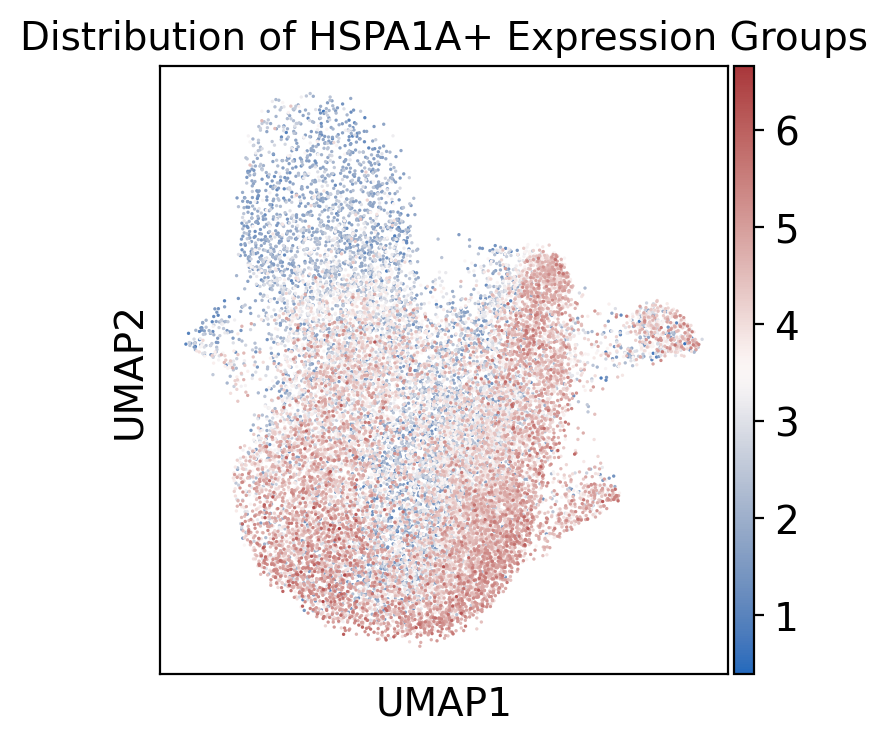

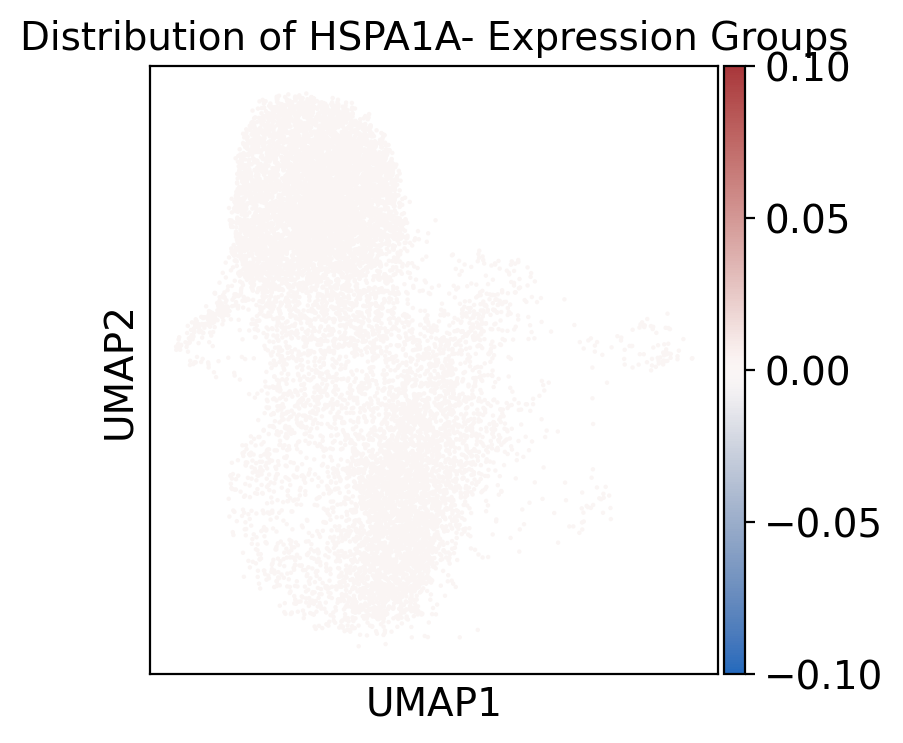

In [ ]:
sc.pl.umap(
    adata_hspa1apos,
    color='HSPA1A',
    title='Distribution of HSPA1A+ Expression Groups',
    palette="vlag",
    cmap = "vlag" ,
    legend_loc='right margin',
)
sc.pl.umap(
    adata_hspa1aneg,
    color='HSPA1A',
    title='Distribution of HSPA1A- Expression Groups',
    palette="vlag",
    cmap = "vlag" ,
    legend_loc='right margin',
)

In [ ]:
hspa1apos = AnnData(X=adata_hspa1apos.X,
                    obs=pd.DataFrame(index=adata_hspa1apos.obs_names),
                    var=pd.DataFrame(index=adata_hspa1apos.var_names))


In [ ]:
save_path = os.path.join(path, 'case.h5ad')
hspa1apos.write(save_path)

In [ ]:
hspa1aneg = AnnData(X=adata_hspa1aneg.X,
                    obs=pd.DataFrame(index=adata_hspa1aneg.obs_names),
                    var=pd.DataFrame(index=adata_hspa1aneg.var_names))


In [ ]:
save_path = os.path.join(path, 'ctr.h5ad')
hspa1aneg.write(save_path)

### **Runing Deep-scSTAR**

In [45]:
!python run_DscSTAR.py --f "h5ad" --s "h5ad"\
--data-folder "inputs/" \
--input-1 "case.h5ad" \
--input-2 "ctr.h5ad" \
--output-1 "case.out.h5ad" \
--output-2 "ctr.out.h5ad" \
--output-folder "outputs/"

2024-11-01 06:31:07.153622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-01 06:31:07.172865: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-01 06:31:07.178710: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-01 06:31:08.263123: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
(15330, 20512)
(15330, 11962)
read done
[0.00031413 0.18506615 0.01314112 ... 0.00031765 0.00104437 0.00306926]
preprocess done
The shape of the gene_exp is: (15330, 32474)
[0.00031413 0.18506615 0.01314112 ... 0.00031765 0.00104437 0.003069